In [ ]:
#0.준비

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인/와인품질분류/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인/와인품질분류/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인/와인품질분류/data/sample_submission.csv')


In [21]:
train['type'] = train['type'].map(lambda x : 0 if x == 'white' else 1)
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0


In [15]:
train.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [22]:
features = train.columns[2:]
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

In [23]:
X = train[features]
y = train['quality']

In [28]:
#validation셋 구축

from sklearn.model_selection import train_test_split

random_state = 123123
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=random_state)


In [36]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(4397, 1100, 4397, 1100)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=random_state)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

In [31]:
#4 모델 검증

import numpy as np

def ACC(true, pred):
  score = np.mean(true == pred)
  return score

  

In [35]:
acc = ACC(y_valid, y_pred)
acc

0.6863636363636364

In [37]:
validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})
validation

,y_valid,y_pred
59,5,5
5422,6,6
3734,5,5
1704,6,6
5449,6,6
...,...,...
2602,5,5
224,5,5
2592,3,5
1726,5,5


In [41]:
validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
validation_count

,y_valid
3,4
4,28
5,397
6,459
7,183
8,29


In [44]:
validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index()
validation_count = validation_count.fillna(0)
validation_count


,y_valid,y_pred
3,4,0.0
4,28,4.0
5,397,352.0
6,459,592.0
7,183,139.0
8,29,13.0


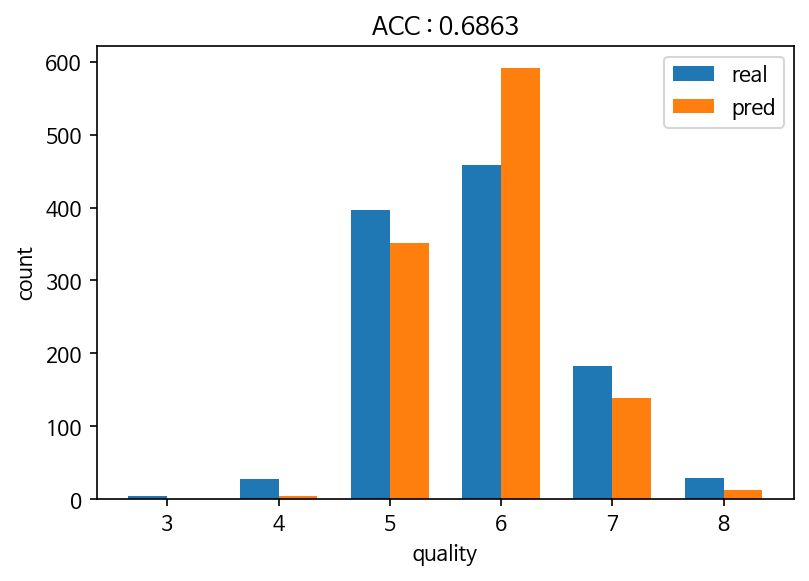

In [45]:
x = validation_count.index
y_valid_count = validation_count['y_valid']
y_pred_count = validation_count['y_pred']

width = 0.35

plt.figure(dpi=150)

plt.title('ACC : ' + str(acc)[:6])
plt.xlabel('quality')
plt.ylabel('count')

p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

plt.legend()
plt.show()


In [46]:
def make_plot():

  acc = ACC(y_valid, y_pred)

  validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})

  validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
  validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index()
  validation_count = validation_count.fillna(0)

  x = validation_count.index
  y_valid_count = validation_count['y_valid']
  y_pred_count = validation_count['y_pred']

  width = 0.35

  plt.figure(dpi=150)

  plt.title('ACC : ' + str(acc)[:6])
  plt.xlabel('quality')
  plt.ylabel('count')

  p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
  p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

  plt.legend()
  plt.show()


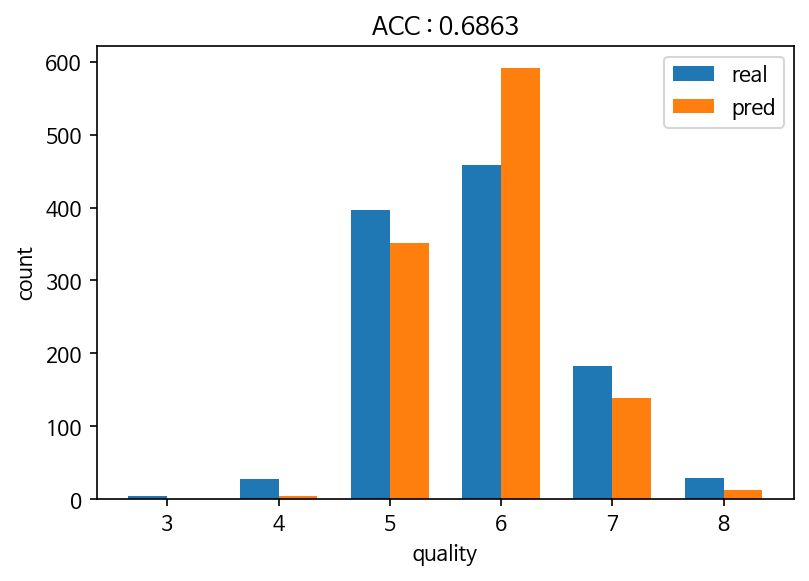

In [47]:
make_plot()